(<Axes: >, <matplotlib.image.AxesImage at 0x7f08a13460f0>)

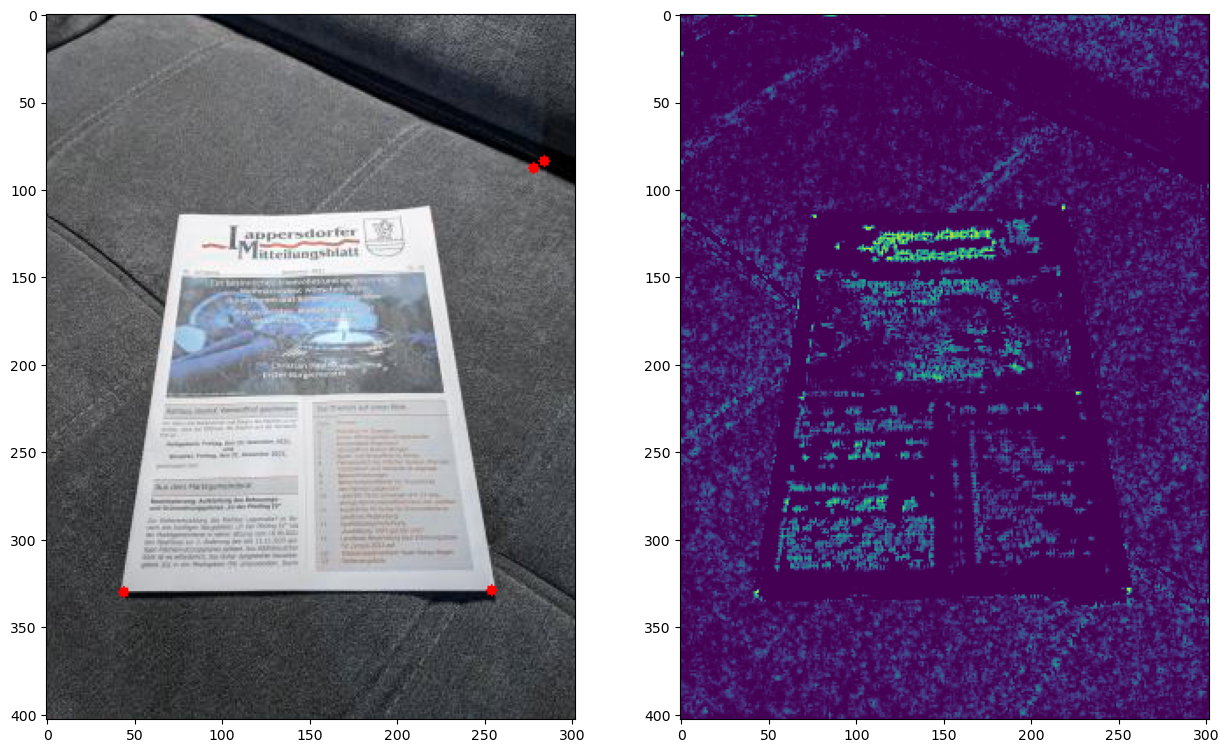

In [62]:
import cv2
import math
import numpy as np
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

# Let's read the image
img = cv2.imread('/home/hask/Project/cv_homework/lesson6/data/document.jpg')
# Convert it to gray scale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)/255
rows, cols = gray.shape

# img = cv2.convertScaleAbs(img, 1.5, 0)

# Compute Harris corners (use the available OpenCV functions)
# Suggested parameters:
#            block size of 2 pixels
#            gradient kernel size of 3 pixels
#            k parameter equal to 0.04
block_size = 2
ksize = 3
k = 0.04
cornerness = cv2.cornerHarris(gray, block_size, ksize, k)

cornerness[cornerness < 0] = 0

# Since cornerness has a huge dynamic range, let's take the logarithm for better visualization and manipulation
cornerness = np.log(cornerness + 1e-6)

# We are not interested in edges, so put to zero all negative cornerness values
cornerness = cv2.normalize(cornerness, None, 0, 255, cv2.NORM_MINMAX)
cornerness = np.uint8(cornerness)

# Let's now plot the image and the corresponding Harris corners (in log scale)
plt.subplot(121), plt.imshow(img)
plt.subplot(122), plt.imshow(cornerness)



